In [35]:
!if [ ! -d mov-in-covid ]; then \
  git clone https://github.com/tanaxer01/mov-in-covid; \
  mv mov-in-covid/*.py .; fi

from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import utils

In [36]:
datasets = {
  # DP51
  "dp51_difs": "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto51/ISCI_std.csv",
  # DP82
  "dp82_weeks": "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto82/ISCI_weeks.csv",
  "dp82_weekends": "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto82/ISCI_weekends.csv",
  # DP...
}

for name, url in datasets.items():
  utils.get_file(name, url)

# DATASET PREP

## DP51
link: [product51](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto51)


In [137]:
df_difs = pd.read_csv("./datos/dp51_difs.csv")

# Just RM
df_difs = df_difs[ df_difs['Codigo region'] == 13 ].drop(columns=['Region', 'Codigo region'])

# Sort by Fecha
df_difs['Fecha'] = pd.to_datetime(df_difs['Fecha'])
df_difs = df_difs.sort_values(by=['Fecha'])

def parse_diff(x):
  mean = sum([ int(i)  for i in x[1:-2].replace('%','').split(",") ])/2
  
  return (100 + mean)/100

df_difs['salida'] = df_difs['Dif salida'].map(parse_diff)

salida_comuna = df_difs[ df_difs['Comuna'] == 'Santiago' ].groupby('Fecha')['salida'].mean()
#set(salida_comuna)

## DP82
link: [product82](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto82)

In [146]:
df_weeks = pd.read_csv('./datos/dp82_weeks.csv')
#df_weekends = pd.read_csv('./datos/dp82_weekends.csv')

# Just RM
df_weeks = df_weeks[ df_weeks['region'] == 13 ].drop(columns=['region'])

# [!] Fill pasos 
df_weeks["paso"] = df_weeks["paso"].fillna(method="bfill")

# Sort by Fecha
df_weeks['fecha_inicio'] = pd.to_datetime(df_weeks['fecha_inicio'])
df_weeks = df_weeks.sort_values(by=['fecha_inicio'])

df_weeks.head()

,semana,paso,nom_comuna,comuna,fecha_inicio,fecha_termino,var_salidas,var_salidas_cota_inferior,var_salidas_cota_superior
8784,9,0.0,SANTIAGO,13101,2020-03-02,2020-03-06,0.990904,0.984820,0.996988
14184,9,0.0,MARÍA PINTO,13504,2020-03-02,2020-03-06,0.978093,0.966975,0.989210
12504,9,0.0,VITACURA,13132,2020-03-02,2020-03-06,0.995176,0.979763,1.010590
11184,9,0.0,PEDRO AGUIRRE CERDA,13121,2020-03-02,2020-03-06,0.998329,0.995217,1.001441
9384,9,0.0,ESTACIÓN CENTRAL,13106,2020-03-02,2020-03-06,0.995008,0.989583,1.000434


## Prom `Dif salida` VS `var_salidas`
En general siguen las mismas tendencias, pero tienen una diferencia de 0.2 que no estoy seguro pq ocurre.
Lo unico raro es la diferencia al final, (el peak hacia abajo es por un error de mediciones en uno de los datasets.) pero al final, el dataset `var` tiene un amuento raro que no se ve en la otra curva.

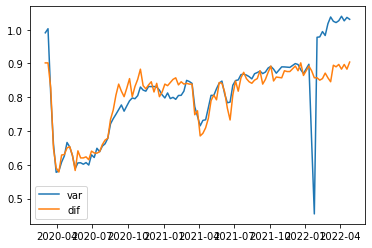

0.19000725738526164

In [160]:
temp = df_weeks[ (df_weeks["fecha_inicio"].isin(salida_comuna.index)) & (df_weeks["nom_comuna"] == "SANTIAGO") ].set_index("fecha_inicio")

plt.figure()

#plt.plot(temp["paso"] / 8 + 0.5)
plt.plot(temp["var_salidas"])
plt.plot(salida_comuna - 0.2)

plt.legend(["var", "dif"])
plt.show()

(salida_comuna - temp["var_salidas"]).mean()